In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import plot_model

import numpy as np
import os

Lectura de imágenes de la base de datos CIFER-10

In [3]:
(x_train, y_train), (x_test, y_test)       = cifar10.load_data()
(trainimages, numrows, numcols, numcolors) = x_train.shape

# normalización
x_train  = x_train.astype('float32') / 255.
x_test   = x_test.astype('float32')  / 255.

print('x_train shape:', trainimages, numrows, numcols, numcolors)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0],  'test samples')

x_train shape: 50000 32 32 3
50000 train samples
10000 test samples


Ejemplos de imágenes de CIFER-10

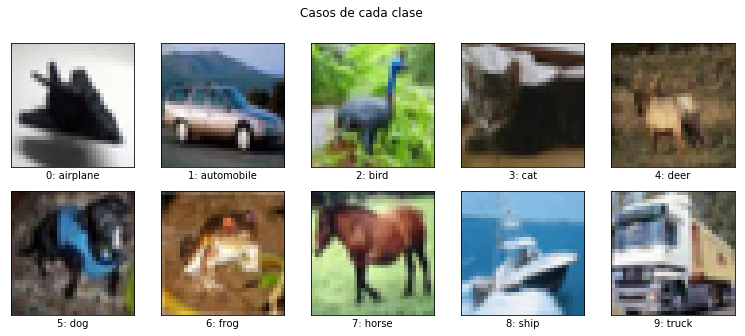

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes=len(names)

fig, ax = plt.subplots(figsize=(13,5), nrows=2, ncols=5, sharex=True, sharey=True,)
fig.suptitle('Casos de cada clase')
ax = ax.flatten()
for i in range(10):
    ax[i].imshow(x_train[list(y_train).index(i),:,:,:], interpolation='nearest')
    ax[i].set_xlabel(str(i) + ': '+ names[i])

ax[0].set_xticks([])
ax[0].set_yticks([])
#plt.savefig('cimfar-10.png')
plt.show()

Primeras imágenes

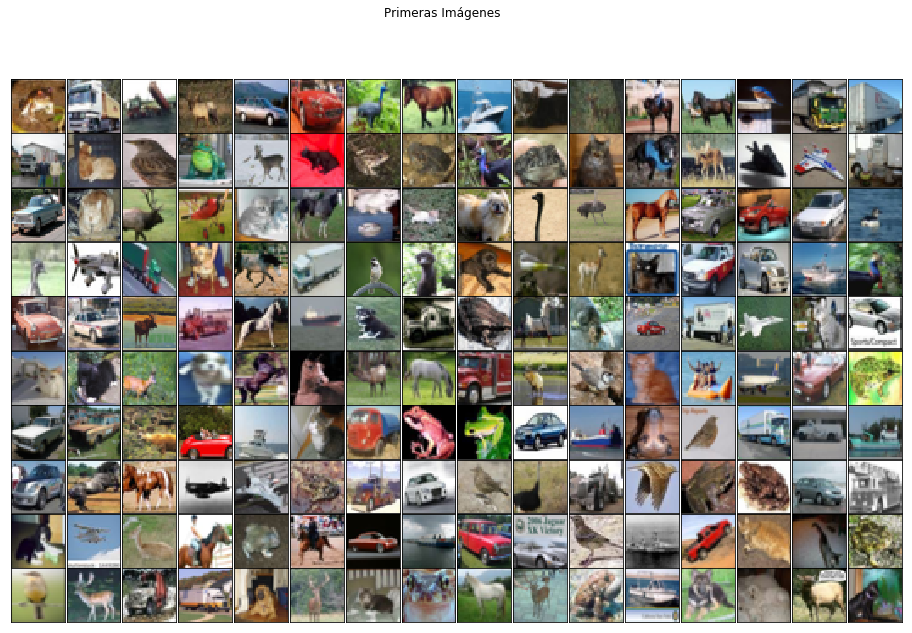

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


rows_imgs=10
cols_imgs=16
fig, ax = plt.subplots(figsize=(16,10), nrows=rows_imgs, ncols=cols_imgs, sharex=True, sharey=True,)
fig.suptitle('Primeras Imágenes')
ax = ax.flatten()
for i in range(rows_imgs*cols_imgs):
    ax[i].imshow(x_train[i], interpolation='nearest')
    idx = y_train[i][0]
    #ax[i].set_xlabel(str(idx)+': '+ names[idx])
ax[0].set_xticks([])
ax[0].set_yticks([])
#plt.savefig('cimfar-10-a.png')
plt.subplots_adjust(wspace=0.01, hspace=0.01)

plt.show()

Histograma de ocurrencia de las clases

10

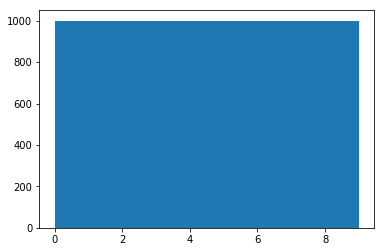

In [6]:
plt.hist(y_test)
num_classes

Conversión de etiquetas a vectores indicadores

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

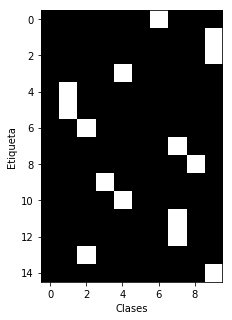

In [8]:
plt.subplots(figsize=(5,5))
plt.imshow(y_train[0:15,:], cmap='gray', interpolation='nearest')
plt.ylabel('Etiqueta')
plt.xlabel('Clases')
#plt.savefig('vectores_infocadores.png')
plt.show()

Definición del Modelo CNN-Sequencial

In [9]:
model = Sequential()

model.add(Conv2D(filters        = 32, 
                 kernel_size    = (3, 3), 
                 padding        = 'same', 
                 activation     = 'relu', 
                 input_shape    = x_train.shape[1:]))

model.add(Conv2D(filters        = 32, 
                 kernel_size    = (3, 3), 
                 activation     = 'relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters        = 64, 
                 kernel_size    = (3, 3), 
                 padding        = 'same',  
                 activation     = 'relu'))

model.add(Conv2D(filters        = 64, 
                 kernel_size    = (3, 3),  
                 activation     = 'relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=512, activation= 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units=num_classes, activation= 'softmax'))

model.summary()

plot_model(model, to_file='cnn_aumenta.png', show_shapes=True) #guardamos una imagen del modelo como grafo

W0628 20:51:36.485797 139981548021632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0628 20:51:36.522578 139981548021632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0628 20:51:36.528978 139981548021632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0628 20:51:36.568516 139981548021632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0628 20:51:36.572967 139981548021632 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

Inicializando el optimizador

In [0]:
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

Se compila el modelo, definiendo la función de pérdida, el optimizador y la métrica

In [11]:
model.compile(loss      = 'categorical_crossentropy',
              optimizer = opt,
              metrics   = ['accuracy'])

W0628 20:51:46.280728 139981548021632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0628 20:51:46.300672 139981548021632 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



Dos opciones para ajustar el modelo

In [0]:
batch_size        = 32           # tamaño del lote (batch), originalmente 32
num_classes       = 10 
epochs            = 10           # originalmente 100
data_augmentation = True
# num_predictions = 20

Archivo con los resultados: modelo y pesos

In [0]:
save_dir   = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5' 

In [16]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
            featurewise_center           = False,  # pone la media de los rasgos a cero el conjunto de datos 
            samplewise_center            = False,  # pone cada dato a media cero
            featurewise_std_normalization= False,  # divide cada razgo entre su desv estandard
            samplewise_std_normalization = False,  # divide cada dato entre su desv estandard
            zca_whitening                = False,  # aplica blanqueo ZCA
            rotation_range               = 0,      # rota aleatoriamente la imagens estos grados (0 a +-180)
            width_shift_range            = 0.1,    # recorre la imagen horizontalmente una razon alaatoria [0, r]
            height_shift_range           = 0.1,    # recorre la imagen verticalmente una razon alaatoria [0, r]
            horizontal_flip              = True,   # refleja aleatoriamente la imagen en forma horizontal
            vertical_flip                = False)  # refleja aleatoriamente la imagen en forma vertical

#  Calcula parametros internos necesario (medias, dev-std, PCA, etc).
datagen.fit(x_train)

# Ajusta el modelo en lotes generados 
model.fit_generator(datagen.flow(
                                x          = x_train, 
                                y          = y_train,
                                batch_size = batch_size
                                ),
                    steps_per_epoch = int(np.ceil(x_train.shape[0] / float(batch_size))),
                    epochs          = epochs,
                    validation_data = (x_test, y_test),
                    verbose=1
                   )

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0889 - acc: 0.6155 - val_loss: 0.9367 - val_acc: 0.6732
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0558 - acc: 0.6268 - val_loss: 1.0240 - val_acc: 0.6434
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0300 - acc: 0.6389 - val_loss: 0.9140 - val_acc: 0.6819
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0054 - acc: 0.6447 - val_loss: 0.8980 - val_acc: 0.6862
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9871 - acc: 0.6543 - val_loss: 0.8947 - val_acc: 0.6885
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9629 - acc: 0.6617 - val_loss: 0.9988 - val_acc: 0.6683
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9388 - acc: 0.6720 - val_loss: 0.8443 - val_acc: 0.7122
Epoch 8/10
1563/1563 [==========================

In [0]:
if not data_augmentation:
    print('SIN Aumentación de datos.')
    model.fit(x         = x_train, 
              y         = y_train,
              batch_size= batch_size,
              epochs    = epochs,
              validation_split=.2,
              shuffle=True)
else:
    print('CON Aumentación de datos en tiempo real.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
                featurewise_center           = False,  # pone la media de los rasgos a cero el conjunto de datos 
                samplewise_center            = False,  # pone cada dato a media cero
                featurewise_std_normalization= False,  # divide cada razgo entre su desv estandard
                samplewise_std_normalization = False,  # divide cada dato entre su desv estandard
                zca_whitening                = False,  # aplica blanqueo ZCA
                rotation_range               = 0,      # rota aleatoriamente la imagens estos grados (0 a +-180)
                width_shift_range            = 0.1,    # recorre la imagen horizontalmente una razon alaatoria [0, r]
                height_shift_range           = 0.1,    # recorre la imagen verticalmente una razon alaatoria [0, r]
                horizontal_flip              = True,   # refleja aleatoriamente la imagen en forma horizontal
                vertical_flip                = False)  # refleja aleatoriamente la imagen en forma vertical
    
    #  Calcula parametros internos necesario (medias, dev-std, PCA, etc).
    datagen.fit(x_train)

    # Ajusta el modelo en lotes generados 
    model.fit_generator(datagen.flow(
                                    x          = x_train, 
                                    y          = y_train,
                                    batch_size = batch_size
                                    ),
                        steps_per_epoch = int(np.ceil(x_train.shape[0] / float(batch_size))),
                        epochs          = epochs,
                        validation_data = (x_test, y_test),
                        verbose=1
                       )

Salvar el modelo y los pesos

In [0]:
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Visualizando la calidad de los resultados

In [0]:
import numpy as np

y_pred = model.predict(x_test).squeeze()
y_test_label = np.argmax(y_test,1) 
y_pred_label = np.argmax(y_pred,1)

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
C=confusion_matrix(y_pred_label, y_test_label) 
C

array([[742,   4,  62,  21,  24,  13,   6,  17,  27,  22],
       [ 38, 911,  15,  26,   6,  13,  14,   7,  36, 104],
       [ 48,   4, 624, 100,  66,  90,  42,  49,  12,   4],
       [  5,   2,  12, 358,  11, 128,  18,  10,   1,   3],
       [ 13,   0,  87,  90, 646,  57,  27,  31,   3,   3],
       [  0,   0,  33, 109,  12, 506,   4,  20,   0,   1],
       [  9,   4,  78, 139,  87,  46, 858,   6,   1,   5],
       [ 12,   2,  46,  76, 124, 107,   6, 832,   5,   9],
       [ 96,  14,  23,  47,  19,  16,  13,   6, 891,  22],
       [ 37,  59,  20,  34,   5,  24,  12,  22,  24, 827]])

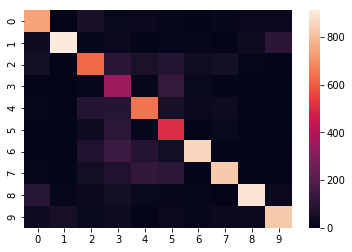

In [19]:
import seaborn as sns
# En escala logaritmica !
#plt.title('Confusion Matrix')
sns.heatmap(C, xticklabels=np.arange(10), yticklabels=np.arange(10))

Precisión

In [20]:
precision_score(y_pred_label, y_test_label, average='macro')

0.7195

Recall

In [21]:
recall_score(y_pred_label, y_test_label,  average='macro')

0.716970677370387

F1-score

In [22]:
f1_score(y_pred_label, y_test_label,  average='macro')

0.7090466068955488

Falta mas entrenamiento …

In [23]:
print('Clasificados correctamente =', np.sum(np.diag(C))/np.sum(C[:])*100, r'%')

Clasificados correctamente = 71.95 %


Modelo Final

In [24]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import os

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Lectura y preprocesamiento de los datos
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
(x_train, y_train), (x_test, y_test)       = cifar10.load_data()
(trainimages, numrows, numcols, numcolors) = x_train.shape

# normalización
x_train  = x_train.astype('float32') / 255.
x_test   = x_test.astype('float32')  / 255.

print('x_train shape:', trainimages, numrows, numcols, numcolors)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0],  'test samples')

# conversion de etiquetas a vectores indicadores
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# CCN
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
model = Sequential()
model.add(Conv2D(filters        = 32, 
                 kernel_size    = (3, 3), 
                 padding        = 'same', 
                 activation     = 'relu', 
                 input_shape    = x_train.shape[1:]))
model.add(Conv2D(filters        = 32, 
                 kernel_size    = (3, 3), 
                 activation     = 'relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters        = 64, 
                 kernel_size    = (3, 3), 
                 padding        = 'same',  
                 activation     = 'relu'))
model.add(Conv2D(filters        = 64, 
                 kernel_size    = (3, 3),  
                 activation     = 'relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=512, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units=num_classes, activation= 'softmax'))

# definicion del optimizador
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# compilacion del modelo
model.compile(loss      = 'categorical_crossentropy',
              optimizer = opt,
              metrics   = ['accuracy'])

# Parametros para Entrenamiento
batch_size        = 32           # tamaño del lote (batch), originalmente 32
num_classes       = 10 
epochs            = 20           # originalmente 100
data_augmentation = True
# num_predictions = 20
save_dir          = os.path.join(os.getcwd(), 'saved_models')
model_name        = 'keras_cifar10_trained_model.h5' 

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Entrenamiento CON/SIN aumentación
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
if not data_augmentation:
    print('SIN Aumentación de datos.')
    model.fit(x         = x_train, 
              y         = y_train,
              batch_size= batch_size,
              epochs    = epochs,
              validation_split=.2,
              shuffle=True)
else:
    print('CON Aumentación de datos en tiempo real.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
                featurewise_center           = False,  # pone la media de los rasgos a cero el conjunto de datos 
                samplewise_center            = False,  # pone cada dato a media cero
                featurewise_std_normalization= False,  # divide cada razgo entre su desv estandard
                samplewise_std_normalization = False,  # divide cada dato entre su desv estandard
                zca_whitening                = False,  # aplica blanqueo ZCA
                rotation_range               = 0,      # rota aleatoriamente la imagens estos grados (0 a +-180)
                width_shift_range            = 0.1,    # recorre la imagen horizontalmente una razon alaatoria [0, r]
                height_shift_range           = 0.1,    # recorre la imagen verticalmente una razon alaatoria [0, r]
                horizontal_flip              = True,   # refleja aleatoriamente la imagen en forma horizontal
                vertical_flip                = False)  # refleja aleatoriamente la imagen en forma vertical
    
    #  Calcula parametros internos necesario (medias, dev-std, PCA, etc).
    datagen.fit(x_train)

    # Ajusta el modelo en lotes generados 
    model.fit_generator(datagen.flow(
                                    x          = x_train, 
                                    y          = y_train,
                                    batch_size = batch_size
                                    ),
                        steps_per_epoch = int(np.ceil(x_train.shape[0] / float(batch_size))),
                        epochs          = epochs,
                        validation_data = (x_test, y_test)
                       )

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Salva el modelo entrenado
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# Evalua el modelo entrenado
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: 50000 32 32 3
50000 train samples
10000 test samples
CON Aumentación de datos en tiempo real.
Epoch 1/20
1563/1563 [==============================] - 27s 17ms/step - loss: 1.8401 - acc: 0.3282 - val_loss: 1.5594 - val_acc: 0.4373
Epoch 2/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.5467 - acc: 0.4335 - val_loss: 1.5268 - val_acc: 0.4465
Epoch 3/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4262 - acc: 0.4869 - val_loss: 1.3579 - val_acc: 0.5172
Epoch 4/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3389 - acc: 0.5198 - val_loss: 1.2046 - val_acc: 0.5726
Epoch 5/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2671 - acc: 0.5486 - val_loss: 1.1586 - val_acc: 0.5895
Epoch 6/20
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2034 - acc: 0.5715 - val_loss: 1.1067 - val_acc: 0.6066
Epoch 7/20
1563/1563 [==============================] - 26s 17ms/step - los